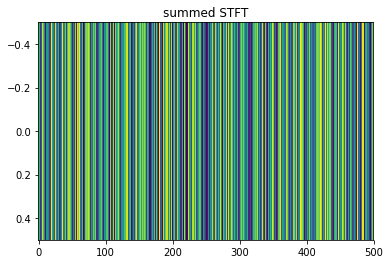

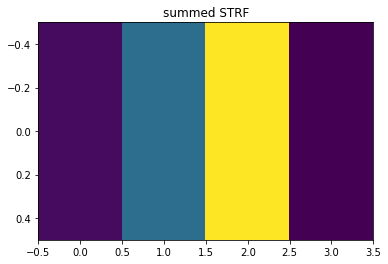

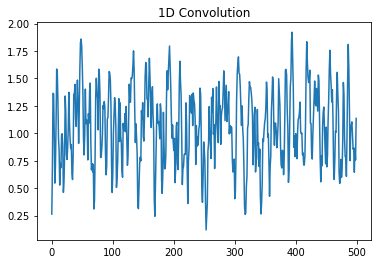

In [839]:
import scipy.io.wavfile as wavefile
import scipy.signal as signal
import numpy as np
import matplotlib.pyplot as plt

ONED = True

num = 500
nbFbins = 3
time_window = 4

stft = np.random.rand(num)
plt.imshow(np.transpose(np.expand_dims(stft,axis=1)),aspect='auto') 
plt.title('summed STFT')

### STRF ###
strf = np.random.rand(time_window)
plt.figure()
plt.imshow(np.expand_dims(strf,axis=1).transpose(),aspect='auto')
plt.title('summed STRF')

### Convolution ###
conved = signal.convolve(stft,strf,mode='full')
conved = conved[0:num]
plt.figure()
plt.title('1D Convolution')
plt.plot(conved)


In [840]:
#### KERAS 1D CONV MODEL

# Create your first MLP in Keras
from keras.models import Sequential
from keras.layers import Conv1D,Dense,Conv2D
from keras.layers.advanced_activations import LeakyReLU
from keras.constraints import non_neg
import keras.initializers as initializers
#import keras.initializers

# fix random seed for reproducibility
np.random.seed(7)

#_________________Training input (X)_______________________#

X = np.atleast_3d(stft)

#_________________Training output (Y)_______________________#

Y = np.atleast_3d(conved)
    
model = Sequential()
layer = Conv1D(input_shape=np.shape(X)[1:3],filters=1,kernel_size=time_window,strides=1,
            padding='causal',dilation_rate=1,use_bias=False)

layer.kernel_initializer = initializers.RandomUniform(minval=-0.05, maxval=0.05, seed=None)
#layer.kernel_initializer = 'random_uniform'
model.add(layer)

# Compile model
model.compile(loss='mean_squared_error', optimizer='sgd')

# Fit the model
history = model.fit(X, Y, epochs=8000)

# evaluate the model
scores = model.evaluate(X, Y)
print("\n%s: %.2f%%" % (model.metrics_names[0], scores*100))

Epoch 1/8000
1/1 [==============================] - 1s 793ms/step - loss: 1.2139
Epoch 2/8000
1/1 [==============================] - 0s 3ms/step - loss: 1.1605
Epoch 3/8000
1/1 [==============================] - 0s 2ms/step - loss: 1.1095
Epoch 4/8000
1/1 [==============================] - 0s 2ms/step - loss: 1.0608
Epoch 5/8000
1/1 [==============================] - 0s 2ms/step - loss: 1.0142
Epoch 6/8000
1/1 [==============================] - 0s 2ms/step - loss: 0.9697
Epoch 7/8000
1/1 [==============================] - 0s 1ms/step - loss: 0.9272
Epoch 8/8000
1/1 [==============================] - 0s 2ms/step - loss: 0.8866
Epoch 9/8000
1/1 [==============================] - 0s 1ms/step - loss: 0.8478
Epoch 10/8000
1/1 [==============================] - 0s 1ms/step - loss: 0.8107
Epoch 11/8000
1/1 [==============================] - 0s 2ms/step - loss: 0.7753
Epoch 12/8000
1/1 [==============================] - 0s 1ms/step - loss: 0.7414
Epoch 13/8000
1/1 [============================

Epoch 104/8000
1/1 [==============================] - 0s 1ms/step - loss: 0.0233
Epoch 105/8000
1/1 [==============================] - 0s 1ms/step - loss: 0.0228
Epoch 106/8000
1/1 [==============================] - 0s 1ms/step - loss: 0.0223
Epoch 107/8000
1/1 [==============================] - 0s 1ms/step - loss: 0.0218
Epoch 108/8000
1/1 [==============================] - 0s 1ms/step - loss: 0.0213
Epoch 109/8000
1/1 [==============================] - 0s 1ms/step - loss: 0.0209
Epoch 110/8000
1/1 [==============================] - 0s 1ms/step - loss: 0.0204
Epoch 111/8000
1/1 [==============================] - 0s 1ms/step - loss: 0.0200
Epoch 112/8000
1/1 [==============================] - 0s 1ms/step - loss: 0.0196
Epoch 113/8000
1/1 [==============================] - 0s 1ms/step - loss: 0.0193
Epoch 114/8000
1/1 [==============================] - 0s 1ms/step - loss: 0.0189
Epoch 115/8000
1/1 [==============================] - 0s 1ms/step - loss: 0.0186
Epoch 116/8000
1/1 [========

1/1 [==============================] - 0s 1ms/step - loss: 0.0092
Epoch 206/8000
1/1 [==============================] - 0s 1ms/step - loss: 0.0092
Epoch 207/8000
1/1 [==============================] - 0s 1ms/step - loss: 0.0091
Epoch 208/8000
1/1 [==============================] - 0s 1ms/step - loss: 0.0091
Epoch 209/8000
1/1 [==============================] - 0s 1ms/step - loss: 0.0091
Epoch 210/8000
1/1 [==============================] - 0s 1ms/step - loss: 0.0090
Epoch 211/8000
1/1 [==============================] - 0s 1ms/step - loss: 0.0090
Epoch 212/8000
1/1 [==============================] - 0s 1ms/step - loss: 0.0090
Epoch 213/8000
1/1 [==============================] - 0s 1ms/step - loss: 0.0090
Epoch 214/8000
1/1 [==============================] - 0s 1ms/step - loss: 0.0089
Epoch 215/8000
1/1 [==============================] - 0s 1ms/step - loss: 0.0089
Epoch 216/8000
1/1 [==============================] - 0s 1ms/step - loss: 0.0089
Epoch 217/8000
1/1 [=======================

Epoch 307/8000
1/1 [==============================] - 0s 1ms/step - loss: 0.0067
Epoch 308/8000
1/1 [==============================] - 0s 1ms/step - loss: 0.0067
Epoch 309/8000
1/1 [==============================] - 0s 1ms/step - loss: 0.0066
Epoch 310/8000
1/1 [==============================] - 0s 1ms/step - loss: 0.0066
Epoch 311/8000
1/1 [==============================] - 0s 1ms/step - loss: 0.0066
Epoch 312/8000
1/1 [==============================] - 0s 1ms/step - loss: 0.0066
Epoch 313/8000
1/1 [==============================] - 0s 1ms/step - loss: 0.0066
Epoch 314/8000
1/1 [==============================] - 0s 1ms/step - loss: 0.0065
Epoch 315/8000
1/1 [==============================] - 0s 1ms/step - loss: 0.0065
Epoch 316/8000
1/1 [==============================] - 0s 1ms/step - loss: 0.0065
Epoch 317/8000
1/1 [==============================] - 0s 1ms/step - loss: 0.0065
Epoch 318/8000
1/1 [==============================] - 0s 1ms/step - loss: 0.0065
Epoch 319/8000
1/1 [========

1/1 [==============================] - 0s 1ms/step - loss: 0.0049
Epoch 409/8000
1/1 [==============================] - 0s 1ms/step - loss: 0.0049
Epoch 410/8000
1/1 [==============================] - 0s 1ms/step - loss: 0.0049
Epoch 411/8000
1/1 [==============================] - 0s 2ms/step - loss: 0.0049
Epoch 412/8000
1/1 [==============================] - 0s 1ms/step - loss: 0.0049
Epoch 413/8000
1/1 [==============================] - 0s 1ms/step - loss: 0.0049
Epoch 414/8000
1/1 [==============================] - 0s 1ms/step - loss: 0.0048
Epoch 415/8000
1/1 [==============================] - 0s 1ms/step - loss: 0.0048
Epoch 416/8000
1/1 [==============================] - 0s 1ms/step - loss: 0.0048
Epoch 417/8000
1/1 [==============================] - 0s 1ms/step - loss: 0.0048
Epoch 418/8000
1/1 [==============================] - 0s 1ms/step - loss: 0.0048
Epoch 419/8000
1/1 [==============================] - 0s 1ms/step - loss: 0.0048
Epoch 420/8000
1/1 [=======================

Epoch 510/8000
1/1 [==============================] - 0s 2ms/step - loss: 0.0036
Epoch 511/8000
1/1 [==============================] - 0s 1ms/step - loss: 0.0036
Epoch 512/8000
1/1 [==============================] - 0s 2ms/step - loss: 0.0036
Epoch 513/8000
1/1 [==============================] - 0s 1ms/step - loss: 0.0036
Epoch 514/8000
1/1 [==============================] - 0s 1ms/step - loss: 0.0036
Epoch 515/8000
1/1 [==============================] - 0s 1ms/step - loss: 0.0036
Epoch 516/8000
1/1 [==============================] - 0s 1ms/step - loss: 0.0036
Epoch 517/8000
1/1 [==============================] - 0s 1ms/step - loss: 0.0036
Epoch 518/8000
1/1 [==============================] - 0s 1ms/step - loss: 0.0035
Epoch 519/8000
1/1 [==============================] - 0s 1ms/step - loss: 0.0035
Epoch 520/8000
1/1 [==============================] - 0s 1ms/step - loss: 0.0035
Epoch 521/8000
1/1 [==============================] - 0s 1ms/step - loss: 0.0035
Epoch 522/8000
1/1 [========

1/1 [==============================] - 0s 1ms/step - loss: 0.0027
Epoch 612/8000
1/1 [==============================] - 0s 1ms/step - loss: 0.0027
Epoch 613/8000
1/1 [==============================] - 0s 1ms/step - loss: 0.0027
Epoch 614/8000
1/1 [==============================] - 0s 1ms/step - loss: 0.0027
Epoch 615/8000
1/1 [==============================] - 0s 1ms/step - loss: 0.0026
Epoch 616/8000
1/1 [==============================] - 0s 1ms/step - loss: 0.0026
Epoch 617/8000
1/1 [==============================] - 0s 1ms/step - loss: 0.0026
Epoch 618/8000
1/1 [==============================] - 0s 1ms/step - loss: 0.0026
Epoch 619/8000
1/1 [==============================] - 0s 1ms/step - loss: 0.0026
Epoch 620/8000
1/1 [==============================] - 0s 1ms/step - loss: 0.0026
Epoch 621/8000
1/1 [==============================] - 0s 1ms/step - loss: 0.0026
Epoch 622/8000
1/1 [==============================] - 0s 1ms/step - loss: 0.0026
Epoch 623/8000
1/1 [=======================

Epoch 713/8000
1/1 [==============================] - 0s 1ms/step - loss: 0.0020
Epoch 714/8000
1/1 [==============================] - 0s 1ms/step - loss: 0.0020
Epoch 715/8000
1/1 [==============================] - 0s 1ms/step - loss: 0.0020
Epoch 716/8000
1/1 [==============================] - 0s 1ms/step - loss: 0.0020
Epoch 717/8000
1/1 [==============================] - 0s 1ms/step - loss: 0.0019
Epoch 718/8000
1/1 [==============================] - 0s 1ms/step - loss: 0.0019
Epoch 719/8000
1/1 [==============================] - 0s 1ms/step - loss: 0.0019
Epoch 720/8000
1/1 [==============================] - 0s 1ms/step - loss: 0.0019
Epoch 721/8000
1/1 [==============================] - 0s 1ms/step - loss: 0.0019
Epoch 722/8000
1/1 [==============================] - 0s 1ms/step - loss: 0.0019
Epoch 723/8000
1/1 [==============================] - 0s 1ms/step - loss: 0.0019
Epoch 724/8000
1/1 [==============================] - 0s 1ms/step - loss: 0.0019
Epoch 725/8000
1/1 [========

1/1 [==============================] - 0s 1ms/step - loss: 0.0015
Epoch 815/8000
1/1 [==============================] - 0s 1ms/step - loss: 0.0015
Epoch 816/8000
1/1 [==============================] - 0s 1ms/step - loss: 0.0014
Epoch 817/8000
1/1 [==============================] - 0s 1ms/step - loss: 0.0014
Epoch 818/8000
1/1 [==============================] - 0s 1ms/step - loss: 0.0014
Epoch 819/8000
1/1 [==============================] - 0s 1ms/step - loss: 0.0014
Epoch 820/8000
1/1 [==============================] - 0s 1ms/step - loss: 0.0014
Epoch 821/8000
1/1 [==============================] - 0s 1ms/step - loss: 0.0014
Epoch 822/8000
1/1 [==============================] - 0s 1ms/step - loss: 0.0014
Epoch 823/8000
1/1 [==============================] - 0s 1ms/step - loss: 0.0014
Epoch 824/8000
1/1 [==============================] - 0s 1ms/step - loss: 0.0014
Epoch 825/8000
1/1 [==============================] - 0s 2ms/step - loss: 0.0014
Epoch 826/8000
1/1 [=======================

Epoch 916/8000
1/1 [==============================] - 0s 1ms/step - loss: 0.0011
Epoch 917/8000
1/1 [==============================] - 0s 1ms/step - loss: 0.0011
Epoch 918/8000
1/1 [==============================] - 0s 1ms/step - loss: 0.0011
Epoch 919/8000
1/1 [==============================] - 0s 1ms/step - loss: 0.0011
Epoch 920/8000
1/1 [==============================] - 0s 1ms/step - loss: 0.0011
Epoch 921/8000
1/1 [==============================] - 0s 1ms/step - loss: 0.0011
Epoch 922/8000
1/1 [==============================] - 0s 1ms/step - loss: 0.0011
Epoch 923/8000
1/1 [==============================] - 0s 1ms/step - loss: 0.0010
Epoch 924/8000
1/1 [==============================] - 0s 1ms/step - loss: 0.0010
Epoch 925/8000
1/1 [==============================] - 0s 1ms/step - loss: 0.0010
Epoch 926/8000
1/1 [==============================] - 0s 1ms/step - loss: 0.0010
Epoch 927/8000
1/1 [==============================] - 0s 1ms/step - loss: 0.0010
Epoch 928/8000
1/1 [========

Epoch 1014/8000
1/1 [==============================] - 0s 1ms/step - loss: 7.9796e-04
Epoch 1015/8000
1/1 [==============================] - 0s 1ms/step - loss: 7.9556e-04
Epoch 1016/8000
1/1 [==============================] - 0s 1ms/step - loss: 7.9318e-04
Epoch 1017/8000
1/1 [==============================] - 0s 1ms/step - loss: 7.9080e-04
Epoch 1018/8000
1/1 [==============================] - 0s 1ms/step - loss: 7.8843e-04
Epoch 1019/8000
1/1 [==============================] - 0s 1ms/step - loss: 7.8607e-04
Epoch 1020/8000
1/1 [==============================] - 0s 2ms/step - loss: 7.8372e-04
Epoch 1021/8000
1/1 [==============================] - 0s 1ms/step - loss: 7.8137e-04
Epoch 1022/8000
1/1 [==============================] - 0s 1ms/step - loss: 7.7903e-04
Epoch 1023/8000
1/1 [==============================] - 0s 1ms/step - loss: 7.7669e-04
Epoch 1024/8000
1/1 [==============================] - 0s 1ms/step - loss: 7.7436e-04
Epoch 1025/8000
1/1 [==============================] -

Epoch 1110/8000
1/1 [==============================] - 0s 1ms/step - loss: 5.9825e-04
Epoch 1111/8000
1/1 [==============================] - 0s 1ms/step - loss: 5.9646e-04
Epoch 1112/8000
1/1 [==============================] - 0s 1ms/step - loss: 5.9467e-04
Epoch 1113/8000
1/1 [==============================] - 0s 1ms/step - loss: 5.9289e-04
Epoch 1114/8000
1/1 [==============================] - 0s 1ms/step - loss: 5.9111e-04
Epoch 1115/8000
1/1 [==============================] - 0s 1ms/step - loss: 5.8934e-04
Epoch 1116/8000
1/1 [==============================] - 0s 1ms/step - loss: 5.8758e-04
Epoch 1117/8000
1/1 [==============================] - 0s 1ms/step - loss: 5.8582e-04
Epoch 1118/8000
1/1 [==============================] - 0s 1ms/step - loss: 5.8406e-04
Epoch 1119/8000
1/1 [==============================] - 0s 1ms/step - loss: 5.8231e-04
Epoch 1120/8000
1/1 [==============================] - 0s 1ms/step - loss: 5.8057e-04
Epoch 1121/8000
1/1 [==============================] -

Epoch 1206/8000
1/1 [==============================] - 0s 2ms/step - loss: 4.4858e-04
Epoch 1207/8000
1/1 [==============================] - 0s 2ms/step - loss: 4.4724e-04
Epoch 1208/8000
1/1 [==============================] - 0s 1ms/step - loss: 4.4590e-04
Epoch 1209/8000
1/1 [==============================] - 0s 1ms/step - loss: 4.4457e-04
Epoch 1210/8000
1/1 [==============================] - 0s 3ms/step - loss: 4.4324e-04
Epoch 1211/8000
1/1 [==============================] - 0s 2ms/step - loss: 4.4191e-04
Epoch 1212/8000
1/1 [==============================] - 0s 2ms/step - loss: 4.4059e-04
Epoch 1213/8000
1/1 [==============================] - 0s 2ms/step - loss: 4.3927e-04
Epoch 1214/8000
1/1 [==============================] - 0s 2ms/step - loss: 4.3795e-04
Epoch 1215/8000
1/1 [==============================] - 0s 2ms/step - loss: 4.3664e-04
Epoch 1216/8000
1/1 [==============================] - 0s 2ms/step - loss: 4.3533e-04
Epoch 1217/8000
1/1 [==============================] -

Epoch 1302/8000
1/1 [==============================] - 0s 1ms/step - loss: 3.3641e-04
Epoch 1303/8000
1/1 [==============================] - 0s 2ms/step - loss: 3.3540e-04
Epoch 1304/8000
1/1 [==============================] - 0s 1ms/step - loss: 3.3440e-04
Epoch 1305/8000
1/1 [==============================] - 0s 1ms/step - loss: 3.3340e-04
Epoch 1306/8000
1/1 [==============================] - 0s 2ms/step - loss: 3.3240e-04
Epoch 1307/8000
1/1 [==============================] - 0s 1ms/step - loss: 3.3140e-04
Epoch 1308/8000
1/1 [==============================] - 0s 1ms/step - loss: 3.3041e-04
Epoch 1309/8000
1/1 [==============================] - 0s 1ms/step - loss: 3.2942e-04
Epoch 1310/8000
1/1 [==============================] - 0s 1ms/step - loss: 3.2844e-04
Epoch 1311/8000
1/1 [==============================] - 0s 1ms/step - loss: 3.2745e-04
Epoch 1312/8000
1/1 [==============================] - 0s 1ms/step - loss: 3.2647e-04
Epoch 1313/8000
1/1 [==============================] -

Epoch 1398/8000
1/1 [==============================] - 0s 1ms/step - loss: 2.5231e-04
Epoch 1399/8000
1/1 [==============================] - 0s 1ms/step - loss: 2.5156e-04
Epoch 1400/8000
1/1 [==============================] - 0s 1ms/step - loss: 2.5081e-04
Epoch 1401/8000
1/1 [==============================] - 0s 1ms/step - loss: 2.5006e-04
Epoch 1402/8000
1/1 [==============================] - 0s 2ms/step - loss: 2.4931e-04
Epoch 1403/8000
1/1 [==============================] - 0s 1ms/step - loss: 2.4856e-04
Epoch 1404/8000
1/1 [==============================] - 0s 1ms/step - loss: 2.4782e-04
Epoch 1405/8000
1/1 [==============================] - 0s 1ms/step - loss: 2.4708e-04
Epoch 1406/8000
1/1 [==============================] - 0s 1ms/step - loss: 2.4634e-04
Epoch 1407/8000
1/1 [==============================] - 0s 2ms/step - loss: 2.4560e-04
Epoch 1408/8000
1/1 [==============================] - 0s 1ms/step - loss: 2.4487e-04
Epoch 1409/8000
1/1 [==============================] -

Epoch 1494/8000
1/1 [==============================] - 0s 1ms/step - loss: 1.8927e-04
Epoch 1495/8000
1/1 [==============================] - 0s 1ms/step - loss: 1.8870e-04
Epoch 1496/8000
1/1 [==============================] - 0s 1ms/step - loss: 1.8814e-04
Epoch 1497/8000
1/1 [==============================] - 0s 1ms/step - loss: 1.8757e-04
Epoch 1498/8000
1/1 [==============================] - 0s 1ms/step - loss: 1.8701e-04
Epoch 1499/8000
1/1 [==============================] - 0s 1ms/step - loss: 1.8645e-04
Epoch 1500/8000
1/1 [==============================] - 0s 2ms/step - loss: 1.8590e-04
Epoch 1501/8000
1/1 [==============================] - 0s 2ms/step - loss: 1.8534e-04
Epoch 1502/8000
1/1 [==============================] - 0s 2ms/step - loss: 1.8479e-04
Epoch 1503/8000
1/1 [==============================] - 0s 1ms/step - loss: 1.8423e-04
Epoch 1504/8000
1/1 [==============================] - 0s 1ms/step - loss: 1.8368e-04
Epoch 1505/8000
1/1 [==============================] -

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



1/1 [==============================] - 0s 1ms/step - loss: 2.7424e-05
Epoch 2141/8000
1/1 [==============================] - 0s 1ms/step - loss: 2.7342e-05
Epoch 2142/8000
1/1 [==============================] - 0s 1ms/step - loss: 2.7261e-05
Epoch 2143/8000
1/1 [==============================] - 0s 3ms/step - loss: 2.7179e-05
Epoch 2144/8000
1/1 [==============================] - 0s 2ms/step - loss: 2.7098e-05
Epoch 2145/8000
1/1 [==============================] - 0s 1ms/step - loss: 2.7018e-05
Epoch 2146/8000
1/1 [==============================] - 0s 2ms/step - loss: 2.6937e-05
Epoch 2147/8000
1/1 [==============================] - 0s 2ms/step - loss: 2.6857e-05
Epoch 2148/8000
1/1 [==============================] - 0s 2ms/step - loss: 2.6777e-05
Epoch 2149/8000
1/1 [==============================] - 0s 1ms/step - loss: 2.6697e-05
Epoch 2150/8000
1/1 [==============================] - 0s 2ms/step - loss: 2.6617e-05
Epoch 2151/8000
1/1 [==============================] - 0s 2ms/step - l

Epoch 2236/8000
1/1 [==============================] - 0s 1ms/step - loss: 2.0590e-05
Epoch 2237/8000
1/1 [==============================] - 0s 1ms/step - loss: 2.0528e-05
Epoch 2238/8000
1/1 [==============================] - 0s 1ms/step - loss: 2.0467e-05
Epoch 2239/8000
1/1 [==============================] - 0s 2ms/step - loss: 2.0406e-05
Epoch 2240/8000
1/1 [==============================] - 0s 1ms/step - loss: 2.0345e-05
Epoch 2241/8000
1/1 [==============================] - 0s 1ms/step - loss: 2.0285e-05
Epoch 2242/8000
1/1 [==============================] - 0s 1ms/step - loss: 2.0224e-05
Epoch 2243/8000
1/1 [==============================] - 0s 1ms/step - loss: 2.0164e-05
Epoch 2244/8000
1/1 [==============================] - 0s 1ms/step - loss: 2.0104e-05
Epoch 2245/8000
1/1 [==============================] - 0s 2ms/step - loss: 2.0044e-05
Epoch 2246/8000
1/1 [==============================] - 0s 2ms/step - loss: 1.9984e-05
Epoch 2247/8000
1/1 [==============================] -

Epoch 2332/8000
1/1 [==============================] - 0s 2ms/step - loss: 1.5459e-05
Epoch 2333/8000
1/1 [==============================] - 0s 1ms/step - loss: 1.5413e-05
Epoch 2334/8000
1/1 [==============================] - 0s 1ms/step - loss: 1.5367e-05
Epoch 2335/8000
1/1 [==============================] - 0s 1ms/step - loss: 1.5322e-05
Epoch 2336/8000
1/1 [==============================] - 0s 1ms/step - loss: 1.5276e-05
Epoch 2337/8000
1/1 [==============================] - 0s 1ms/step - loss: 1.5230e-05
Epoch 2338/8000
1/1 [==============================] - 0s 1ms/step - loss: 1.5185e-05
Epoch 2339/8000
1/1 [==============================] - 0s 1ms/step - loss: 1.5140e-05
Epoch 2340/8000
1/1 [==============================] - 0s 2ms/step - loss: 1.5095e-05
Epoch 2341/8000
1/1 [==============================] - 0s 1ms/step - loss: 1.5050e-05
Epoch 2342/8000
1/1 [==============================] - 0s 1ms/step - loss: 1.5005e-05
Epoch 2343/8000
1/1 [==============================] -

Epoch 2428/8000
1/1 [==============================] - 0s 2ms/step - loss: 1.1609e-05
Epoch 2429/8000
1/1 [==============================] - 0s 1ms/step - loss: 1.1574e-05
Epoch 2430/8000
1/1 [==============================] - 0s 2ms/step - loss: 1.1540e-05
Epoch 2431/8000
1/1 [==============================] - 0s 1ms/step - loss: 1.1505e-05
Epoch 2432/8000
1/1 [==============================] - 0s 1ms/step - loss: 1.1471e-05
Epoch 2433/8000
1/1 [==============================] - 0s 1ms/step - loss: 1.1437e-05
Epoch 2434/8000
1/1 [==============================] - 0s 1ms/step - loss: 1.1403e-05
Epoch 2435/8000
1/1 [==============================] - 0s 1ms/step - loss: 1.1369e-05
Epoch 2436/8000
1/1 [==============================] - 0s 1ms/step - loss: 1.1335e-05
Epoch 2437/8000
1/1 [==============================] - 0s 1ms/step - loss: 1.1301e-05
Epoch 2438/8000
1/1 [==============================] - 0s 1ms/step - loss: 1.1268e-05
Epoch 2439/8000
1/1 [==============================] -

Epoch 2524/8000
1/1 [==============================] - 0s 1ms/step - loss: 8.7181e-06
Epoch 2525/8000
1/1 [==============================] - 0s 1ms/step - loss: 8.6922e-06
Epoch 2526/8000
1/1 [==============================] - 0s 1ms/step - loss: 8.6663e-06
Epoch 2527/8000
1/1 [==============================] - 0s 1ms/step - loss: 8.6405e-06
Epoch 2528/8000
1/1 [==============================] - 0s 1ms/step - loss: 8.6148e-06
Epoch 2529/8000
1/1 [==============================] - 0s 1ms/step - loss: 8.5891e-06
Epoch 2530/8000
1/1 [==============================] - 0s 1ms/step - loss: 8.5635e-06
Epoch 2531/8000
1/1 [==============================] - 0s 1ms/step - loss: 8.5380e-06
Epoch 2532/8000
1/1 [==============================] - 0s 1ms/step - loss: 8.5126e-06
Epoch 2533/8000
1/1 [==============================] - 0s 1ms/step - loss: 8.4873e-06
Epoch 2534/8000
1/1 [==============================] - 0s 1ms/step - loss: 8.4620e-06
Epoch 2535/8000
1/1 [==============================] -

Epoch 2620/8000
1/1 [==============================] - 0s 1ms/step - loss: 6.5477e-06
Epoch 2621/8000
1/1 [==============================] - 0s 1ms/step - loss: 6.5282e-06
Epoch 2622/8000
1/1 [==============================] - 0s 1ms/step - loss: 6.5088e-06
Epoch 2623/8000
1/1 [==============================] - 0s 1ms/step - loss: 6.4894e-06
Epoch 2624/8000
1/1 [==============================] - 0s 1ms/step - loss: 6.4701e-06
Epoch 2625/8000
1/1 [==============================] - 0s 1ms/step - loss: 6.4508e-06
Epoch 2626/8000
1/1 [==============================] - 0s 1ms/step - loss: 6.4316e-06
Epoch 2627/8000
1/1 [==============================] - 0s 1ms/step - loss: 6.4125e-06
Epoch 2628/8000
1/1 [==============================] - 0s 1ms/step - loss: 6.3933e-06
Epoch 2629/8000
1/1 [==============================] - 0s 1ms/step - loss: 6.3743e-06
Epoch 2630/8000
1/1 [==============================] - 0s 1ms/step - loss: 6.3554e-06
Epoch 2631/8000
1/1 [==============================] -

Epoch 2716/8000
1/1 [==============================] - 0s 1ms/step - loss: 4.9183e-06
Epoch 2717/8000
1/1 [==============================] - 0s 1ms/step - loss: 4.9036e-06
Epoch 2718/8000
1/1 [==============================] - 0s 1ms/step - loss: 4.8891e-06
Epoch 2719/8000
1/1 [==============================] - 0s 2ms/step - loss: 4.8745e-06
Epoch 2720/8000
1/1 [==============================] - 0s 2ms/step - loss: 4.8600e-06
Epoch 2721/8000
1/1 [==============================] - 0s 1ms/step - loss: 4.8455e-06
Epoch 2722/8000
1/1 [==============================] - 0s 2ms/step - loss: 4.8311e-06
Epoch 2723/8000
1/1 [==============================] - 0s 1ms/step - loss: 4.8168e-06
Epoch 2724/8000
1/1 [==============================] - 0s 2ms/step - loss: 4.8024e-06
Epoch 2725/8000
1/1 [==============================] - 0s 2ms/step - loss: 4.7881e-06
Epoch 2726/8000
1/1 [==============================] - 0s 2ms/step - loss: 4.7739e-06
Epoch 2727/8000
1/1 [==============================] -

Epoch 2812/8000
1/1 [==============================] - 0s 1ms/step - loss: 3.6947e-06
Epoch 2813/8000
1/1 [==============================] - 0s 1ms/step - loss: 3.6837e-06
Epoch 2814/8000
1/1 [==============================] - 0s 3ms/step - loss: 3.6727e-06
Epoch 2815/8000
1/1 [==============================] - 0s 2ms/step - loss: 3.6618e-06
Epoch 2816/8000
1/1 [==============================] - 0s 1ms/step - loss: 3.6509e-06
Epoch 2817/8000
1/1 [==============================] - 0s 1ms/step - loss: 3.6400e-06
Epoch 2818/8000
1/1 [==============================] - 0s 1ms/step - loss: 3.6292e-06
Epoch 2819/8000
1/1 [==============================] - 0s 2ms/step - loss: 3.6184e-06
Epoch 2820/8000
1/1 [==============================] - 0s 1ms/step - loss: 3.6076e-06
Epoch 2821/8000
1/1 [==============================] - 0s 1ms/step - loss: 3.5969e-06
Epoch 2822/8000
1/1 [==============================] - 0s 2ms/step - loss: 3.5862e-06
Epoch 2823/8000
1/1 [==============================] -

Epoch 2908/8000
1/1 [==============================] - 0s 1ms/step - loss: 2.7756e-06
Epoch 2909/8000
1/1 [==============================] - 0s 2ms/step - loss: 2.7674e-06
Epoch 2910/8000
1/1 [==============================] - 0s 1ms/step - loss: 2.7591e-06
Epoch 2911/8000
1/1 [==============================] - 0s 2ms/step - loss: 2.7509e-06
Epoch 2912/8000
1/1 [==============================] - 0s 1ms/step - loss: 2.7427e-06
Epoch 2913/8000
1/1 [==============================] - 0s 1ms/step - loss: 2.7346e-06
Epoch 2914/8000
1/1 [==============================] - 0s 2ms/step - loss: 2.7265e-06
Epoch 2915/8000
1/1 [==============================] - 0s 1ms/step - loss: 2.7183e-06
Epoch 2916/8000
1/1 [==============================] - 0s 1ms/step - loss: 2.7102e-06
Epoch 2917/8000
1/1 [==============================] - 0s 1ms/step - loss: 2.7022e-06
Epoch 2918/8000
1/1 [==============================] - 0s 1ms/step - loss: 2.6942e-06
Epoch 2919/8000
1/1 [==============================] -

Epoch 3004/8000
1/1 [==============================] - 0s 1ms/step - loss: 2.0854e-06
Epoch 3005/8000
1/1 [==============================] - 0s 1ms/step - loss: 2.0792e-06
Epoch 3006/8000
1/1 [==============================] - 0s 1ms/step - loss: 2.0730e-06
Epoch 3007/8000
1/1 [==============================] - 0s 1ms/step - loss: 2.0669e-06
Epoch 3008/8000
1/1 [==============================] - 0s 1ms/step - loss: 2.0607e-06
Epoch 3009/8000
1/1 [==============================] - 0s 2ms/step - loss: 2.0546e-06
Epoch 3010/8000
1/1 [==============================] - 0s 1ms/step - loss: 2.0485e-06
Epoch 3011/8000
1/1 [==============================] - 0s 1ms/step - loss: 2.0424e-06
Epoch 3012/8000
1/1 [==============================] - 0s 1ms/step - loss: 2.0363e-06
Epoch 3013/8000
1/1 [==============================] - 0s 1ms/step - loss: 2.0303e-06
Epoch 3014/8000
1/1 [==============================] - 0s 1ms/step - loss: 2.0242e-06
Epoch 3015/8000
1/1 [==============================] -

Epoch 3100/8000
1/1 [==============================] - 0s 1ms/step - loss: 1.5670e-06
Epoch 3101/8000
1/1 [==============================] - 0s 1ms/step - loss: 1.5623e-06
Epoch 3102/8000
1/1 [==============================] - 0s 2ms/step - loss: 1.5577e-06
Epoch 3103/8000
1/1 [==============================] - 0s 2ms/step - loss: 1.5531e-06
Epoch 3104/8000
1/1 [==============================] - 0s 1ms/step - loss: 1.5484e-06
Epoch 3105/8000
1/1 [==============================] - 0s 2ms/step - loss: 1.5438e-06
Epoch 3106/8000
1/1 [==============================] - 0s 1ms/step - loss: 1.5392e-06
Epoch 3107/8000
1/1 [==============================] - 0s 1ms/step - loss: 1.5347e-06
Epoch 3108/8000
1/1 [==============================] - 0s 1ms/step - loss: 1.5301e-06
Epoch 3109/8000
1/1 [==============================] - 0s 1ms/step - loss: 1.5256e-06
Epoch 3110/8000
1/1 [==============================] - 0s 2ms/step - loss: 1.5210e-06
Epoch 3111/8000
1/1 [==============================] -

Epoch 3196/8000
1/1 [==============================] - 0s 2ms/step - loss: 1.1775e-06
Epoch 3197/8000
1/1 [==============================] - 0s 1ms/step - loss: 1.1740e-06
Epoch 3198/8000
1/1 [==============================] - 0s 1ms/step - loss: 1.1705e-06
Epoch 3199/8000
1/1 [==============================] - 0s 1ms/step - loss: 1.1670e-06
Epoch 3200/8000
1/1 [==============================] - 0s 2ms/step - loss: 1.1636e-06
Epoch 3201/8000
1/1 [==============================] - 0s 2ms/step - loss: 1.1601e-06
Epoch 3202/8000
1/1 [==============================] - 0s 1ms/step - loss: 1.1567e-06
Epoch 3203/8000
1/1 [==============================] - 0s 1ms/step - loss: 1.1533e-06
Epoch 3204/8000
1/1 [==============================] - 0s 1ms/step - loss: 1.1498e-06
Epoch 3205/8000
1/1 [==============================] - 0s 1ms/step - loss: 1.1464e-06
Epoch 3206/8000
1/1 [==============================] - 0s 1ms/step - loss: 1.1430e-06
Epoch 3207/8000
1/1 [==============================] -

Epoch 3292/8000
1/1 [==============================] - 0s 1ms/step - loss: 8.8492e-07
Epoch 3293/8000
1/1 [==============================] - 0s 2ms/step - loss: 8.8229e-07
Epoch 3294/8000
1/1 [==============================] - 0s 1ms/step - loss: 8.7965e-07
Epoch 3295/8000
1/1 [==============================] - 0s 1ms/step - loss: 8.7705e-07
Epoch 3296/8000
1/1 [==============================] - 0s 1ms/step - loss: 8.7445e-07
Epoch 3297/8000
1/1 [==============================] - 0s 1ms/step - loss: 8.7186e-07
Epoch 3298/8000
1/1 [==============================] - 0s 1ms/step - loss: 8.6927e-07
Epoch 3299/8000
1/1 [==============================] - 0s 1ms/step - loss: 8.6670e-07
Epoch 3300/8000
1/1 [==============================] - 0s 1ms/step - loss: 8.6413e-07
Epoch 3301/8000
1/1 [==============================] - 0s 1ms/step - loss: 8.6156e-07
Epoch 3302/8000
1/1 [==============================] - 0s 1ms/step - loss: 8.5899e-07
Epoch 3303/8000
1/1 [==============================] -

Epoch 3388/8000
1/1 [==============================] - 0s 1ms/step - loss: 6.6513e-07
Epoch 3389/8000
1/1 [==============================] - 0s 2ms/step - loss: 6.6316e-07
Epoch 3390/8000
1/1 [==============================] - 0s 1ms/step - loss: 6.6119e-07
Epoch 3391/8000
1/1 [==============================] - 0s 1ms/step - loss: 6.5922e-07
Epoch 3392/8000
1/1 [==============================] - 0s 1ms/step - loss: 6.5726e-07
Epoch 3393/8000
1/1 [==============================] - 0s 1ms/step - loss: 6.5530e-07
Epoch 3394/8000
1/1 [==============================] - 0s 1ms/step - loss: 6.5336e-07
Epoch 3395/8000
1/1 [==============================] - 0s 2ms/step - loss: 6.5141e-07
Epoch 3396/8000
1/1 [==============================] - 0s 1ms/step - loss: 6.4948e-07
Epoch 3397/8000
1/1 [==============================] - 0s 1ms/step - loss: 6.4755e-07
Epoch 3398/8000
1/1 [==============================] - 0s 2ms/step - loss: 6.4564e-07
Epoch 3399/8000
1/1 [==============================] -

Epoch 3484/8000
1/1 [==============================] - 0s 1ms/step - loss: 4.9995e-07
Epoch 3485/8000
1/1 [==============================] - 0s 1ms/step - loss: 4.9846e-07
Epoch 3486/8000
1/1 [==============================] - 0s 1ms/step - loss: 4.9697e-07
Epoch 3487/8000
1/1 [==============================] - 0s 1ms/step - loss: 4.9550e-07
Epoch 3488/8000
1/1 [==============================] - 0s 1ms/step - loss: 4.9403e-07
Epoch 3489/8000
1/1 [==============================] - 0s 2ms/step - loss: 4.9257e-07
Epoch 3490/8000
1/1 [==============================] - 0s 1ms/step - loss: 4.9111e-07
Epoch 3491/8000
1/1 [==============================] - 0s 1ms/step - loss: 4.8966e-07
Epoch 3492/8000
1/1 [==============================] - 0s 1ms/step - loss: 4.8819e-07
Epoch 3493/8000
1/1 [==============================] - 0s 2ms/step - loss: 4.8674e-07
Epoch 3494/8000
1/1 [==============================] - 0s 2ms/step - loss: 4.8530e-07
Epoch 3495/8000
1/1 [==============================] -

Epoch 3580/8000
1/1 [==============================] - 0s 1ms/step - loss: 3.7583e-07
Epoch 3581/8000
1/1 [==============================] - 0s 1ms/step - loss: 3.7472e-07
Epoch 3582/8000
1/1 [==============================] - 0s 1ms/step - loss: 3.7361e-07
Epoch 3583/8000
1/1 [==============================] - 0s 1ms/step - loss: 3.7250e-07
Epoch 3584/8000
1/1 [==============================] - 0s 1ms/step - loss: 3.7140e-07
Epoch 3585/8000
1/1 [==============================] - 0s 1ms/step - loss: 3.7030e-07
Epoch 3586/8000
1/1 [==============================] - 0s 1ms/step - loss: 3.6920e-07
Epoch 3587/8000
1/1 [==============================] - 0s 1ms/step - loss: 3.6810e-07
Epoch 3588/8000
1/1 [==============================] - 0s 1ms/step - loss: 3.6700e-07
Epoch 3589/8000
1/1 [==============================] - 0s 1ms/step - loss: 3.6590e-07
Epoch 3590/8000
1/1 [==============================] - 0s 1ms/step - loss: 3.6481e-07
Epoch 3591/8000
1/1 [==============================] -

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



1/1 [==============================] - 0s 1ms/step - loss: 6.1447e-08
Epoch 4191/8000
1/1 [==============================] - 0s 1ms/step - loss: 6.1265e-08
Epoch 4192/8000
1/1 [==============================] - 0s 2ms/step - loss: 6.1087e-08
Epoch 4193/8000
1/1 [==============================] - 0s 1ms/step - loss: 6.0906e-08
Epoch 4194/8000
1/1 [==============================] - 0s 1ms/step - loss: 6.0728e-08
Epoch 4195/8000
1/1 [==============================] - 0s 1ms/step - loss: 6.0550e-08
Epoch 4196/8000
1/1 [==============================] - 0s 1ms/step - loss: 6.0370e-08
Epoch 4197/8000
1/1 [==============================] - 0s 1ms/step - loss: 6.0191e-08
Epoch 4198/8000
1/1 [==============================] - 0s 2ms/step - loss: 6.0013e-08
Epoch 4199/8000
1/1 [==============================] - 0s 1ms/step - loss: 5.9836e-08
Epoch 4200/8000
1/1 [==============================] - 0s 1ms/step - loss: 5.9658e-08
Epoch 4201/8000
1/1 [==============================] - 0s 1ms/step - l

Epoch 4286/8000
1/1 [==============================] - 0s 1ms/step - loss: 4.6256e-08
Epoch 4287/8000
1/1 [==============================] - 0s 1ms/step - loss: 4.6124e-08
Epoch 4288/8000
1/1 [==============================] - 0s 1ms/step - loss: 4.5989e-08
Epoch 4289/8000
1/1 [==============================] - 0s 1ms/step - loss: 4.5854e-08
Epoch 4290/8000
1/1 [==============================] - 0s 1ms/step - loss: 4.5721e-08
Epoch 4291/8000
1/1 [==============================] - 0s 1ms/step - loss: 4.5585e-08
Epoch 4292/8000
1/1 [==============================] - 0s 1ms/step - loss: 4.5451e-08
Epoch 4293/8000
1/1 [==============================] - 0s 1ms/step - loss: 4.5317e-08
Epoch 4294/8000
1/1 [==============================] - 0s 1ms/step - loss: 4.5184e-08
Epoch 4295/8000
1/1 [==============================] - 0s 1ms/step - loss: 4.5050e-08
Epoch 4296/8000
1/1 [==============================] - 0s 1ms/step - loss: 4.4917e-08
Epoch 4297/8000
1/1 [==============================] -

Epoch 4382/8000
1/1 [==============================] - 0s 1ms/step - loss: 3.4797e-08
Epoch 4383/8000
1/1 [==============================] - 0s 2ms/step - loss: 3.4695e-08
Epoch 4384/8000
1/1 [==============================] - 0s 2ms/step - loss: 3.4592e-08
Epoch 4385/8000
1/1 [==============================] - 0s 1ms/step - loss: 3.4489e-08
Epoch 4386/8000
1/1 [==============================] - 0s 2ms/step - loss: 3.4386e-08
Epoch 4387/8000
1/1 [==============================] - 0s 1ms/step - loss: 3.4285e-08
Epoch 4388/8000
1/1 [==============================] - 0s 2ms/step - loss: 3.4184e-08
Epoch 4389/8000
1/1 [==============================] - 0s 2ms/step - loss: 3.4081e-08
Epoch 4390/8000
1/1 [==============================] - 0s 2ms/step - loss: 3.3980e-08
Epoch 4391/8000
1/1 [==============================] - 0s 2ms/step - loss: 3.3878e-08
Epoch 4392/8000
1/1 [==============================] - 0s 1ms/step - loss: 3.3779e-08
Epoch 4393/8000
1/1 [==============================] -

Epoch 4478/8000
1/1 [==============================] - 0s 1ms/step - loss: 2.6203e-08
Epoch 4479/8000
1/1 [==============================] - 0s 1ms/step - loss: 2.6126e-08
Epoch 4480/8000
1/1 [==============================] - 0s 1ms/step - loss: 2.6046e-08
Epoch 4481/8000
1/1 [==============================] - 0s 1ms/step - loss: 2.5969e-08
Epoch 4482/8000
1/1 [==============================] - 0s 1ms/step - loss: 2.5892e-08
Epoch 4483/8000
1/1 [==============================] - 0s 1ms/step - loss: 2.5814e-08
Epoch 4484/8000
1/1 [==============================] - 0s 1ms/step - loss: 2.5736e-08
Epoch 4485/8000
1/1 [==============================] - 0s 2ms/step - loss: 2.5658e-08
Epoch 4486/8000
1/1 [==============================] - 0s 1ms/step - loss: 2.5586e-08
Epoch 4487/8000
1/1 [==============================] - 0s 1ms/step - loss: 2.5512e-08
Epoch 4488/8000
1/1 [==============================] - 0s 1ms/step - loss: 2.5439e-08
Epoch 4489/8000
1/1 [==============================] -

Epoch 4574/8000
1/1 [==============================] - 0s 1ms/step - loss: 1.9744e-08
Epoch 4575/8000
1/1 [==============================] - 0s 2ms/step - loss: 1.9687e-08
Epoch 4576/8000
1/1 [==============================] - 0s 1ms/step - loss: 1.9629e-08
Epoch 4577/8000
1/1 [==============================] - 0s 1ms/step - loss: 1.9573e-08
Epoch 4578/8000
1/1 [==============================] - 0s 1ms/step - loss: 1.9515e-08
Epoch 4579/8000
1/1 [==============================] - 0s 1ms/step - loss: 1.9459e-08
Epoch 4580/8000
1/1 [==============================] - 0s 1ms/step - loss: 1.9401e-08
Epoch 4581/8000
1/1 [==============================] - 0s 1ms/step - loss: 1.9346e-08
Epoch 4582/8000
1/1 [==============================] - 0s 1ms/step - loss: 1.9289e-08
Epoch 4583/8000
1/1 [==============================] - 0s 1ms/step - loss: 1.9233e-08
Epoch 4584/8000
1/1 [==============================] - 0s 1ms/step - loss: 1.9176e-08
Epoch 4585/8000
1/1 [==============================] -

Epoch 4670/8000
1/1 [==============================] - 0s 1ms/step - loss: 1.4873e-08
Epoch 4671/8000
1/1 [==============================] - 0s 1ms/step - loss: 1.4829e-08
Epoch 4672/8000
1/1 [==============================] - 0s 1ms/step - loss: 1.4786e-08
Epoch 4673/8000
1/1 [==============================] - 0s 1ms/step - loss: 1.4742e-08
Epoch 4674/8000
1/1 [==============================] - 0s 1ms/step - loss: 1.4699e-08
Epoch 4675/8000
1/1 [==============================] - 0s 1ms/step - loss: 1.4655e-08
Epoch 4676/8000
1/1 [==============================] - 0s 2ms/step - loss: 1.4612e-08
Epoch 4677/8000
1/1 [==============================] - 0s 1ms/step - loss: 1.4568e-08
Epoch 4678/8000
1/1 [==============================] - 0s 1ms/step - loss: 1.4524e-08
Epoch 4679/8000
1/1 [==============================] - 0s 1ms/step - loss: 1.4481e-08
Epoch 4680/8000
1/1 [==============================] - 0s 1ms/step - loss: 1.4437e-08
Epoch 4681/8000
1/1 [==============================] -

Epoch 4766/8000
1/1 [==============================] - 0s 1ms/step - loss: 1.1234e-08
Epoch 4767/8000
1/1 [==============================] - 0s 1ms/step - loss: 1.1202e-08
Epoch 4768/8000
1/1 [==============================] - 0s 1ms/step - loss: 1.1169e-08
Epoch 4769/8000
1/1 [==============================] - 0s 1ms/step - loss: 1.1137e-08
Epoch 4770/8000
1/1 [==============================] - 0s 2ms/step - loss: 1.1105e-08
Epoch 4771/8000
1/1 [==============================] - 0s 2ms/step - loss: 1.1072e-08
Epoch 4772/8000
1/1 [==============================] - 0s 1ms/step - loss: 1.1040e-08
Epoch 4773/8000
1/1 [==============================] - 0s 1ms/step - loss: 1.1008e-08
Epoch 4774/8000
1/1 [==============================] - 0s 1ms/step - loss: 1.0975e-08
Epoch 4775/8000
1/1 [==============================] - 0s 2ms/step - loss: 1.0944e-08
Epoch 4776/8000
1/1 [==============================] - 0s 1ms/step - loss: 1.0911e-08
Epoch 4777/8000
1/1 [==============================] -

Epoch 4862/8000
1/1 [==============================] - 0s 1ms/step - loss: 8.4909e-09
Epoch 4863/8000
1/1 [==============================] - 0s 1ms/step - loss: 8.4664e-09
Epoch 4864/8000
1/1 [==============================] - 0s 1ms/step - loss: 8.4416e-09
Epoch 4865/8000
1/1 [==============================] - 0s 1ms/step - loss: 8.4162e-09
Epoch 4866/8000
1/1 [==============================] - 0s 1ms/step - loss: 8.3932e-09
Epoch 4867/8000
1/1 [==============================] - 0s 1ms/step - loss: 8.3677e-09
Epoch 4868/8000
1/1 [==============================] - 0s 2ms/step - loss: 8.3424e-09
Epoch 4869/8000
1/1 [==============================] - 0s 2ms/step - loss: 8.3194e-09
Epoch 4870/8000
1/1 [==============================] - 0s 1ms/step - loss: 8.2945e-09
Epoch 4871/8000
1/1 [==============================] - 0s 1ms/step - loss: 8.2704e-09
Epoch 4872/8000
1/1 [==============================] - 0s 2ms/step - loss: 8.2457e-09
Epoch 4873/8000
1/1 [==============================] -

Epoch 4958/8000
1/1 [==============================] - 0s 1ms/step - loss: 6.4037e-09
Epoch 4959/8000
1/1 [==============================] - 0s 2ms/step - loss: 6.3844e-09
Epoch 4960/8000
1/1 [==============================] - 0s 1ms/step - loss: 6.3650e-09
Epoch 4961/8000
1/1 [==============================] - 0s 1ms/step - loss: 6.3463e-09
Epoch 4962/8000
1/1 [==============================] - 0s 1ms/step - loss: 6.3275e-09
Epoch 4963/8000
1/1 [==============================] - 0s 1ms/step - loss: 6.3089e-09
Epoch 4964/8000
1/1 [==============================] - 0s 1ms/step - loss: 6.2909e-09
Epoch 4965/8000
1/1 [==============================] - 0s 1ms/step - loss: 6.2719e-09
Epoch 4966/8000
1/1 [==============================] - 0s 1ms/step - loss: 6.2546e-09
Epoch 4967/8000
1/1 [==============================] - 0s 1ms/step - loss: 6.2366e-09
Epoch 4968/8000
1/1 [==============================] - 0s 1ms/step - loss: 6.2181e-09
Epoch 4969/8000
1/1 [==============================] -

Epoch 5054/8000
1/1 [==============================] - 0s 1ms/step - loss: 4.8102e-09
Epoch 5055/8000
1/1 [==============================] - 0s 1ms/step - loss: 4.7960e-09
Epoch 5056/8000
1/1 [==============================] - 0s 1ms/step - loss: 4.7829e-09
Epoch 5057/8000
1/1 [==============================] - 0s 1ms/step - loss: 4.7694e-09
Epoch 5058/8000
1/1 [==============================] - 0s 1ms/step - loss: 4.7562e-09
Epoch 5059/8000
1/1 [==============================] - 0s 1ms/step - loss: 4.7425e-09
Epoch 5060/8000
1/1 [==============================] - 0s 1ms/step - loss: 4.7288e-09
Epoch 5061/8000
1/1 [==============================] - 0s 1ms/step - loss: 4.7160e-09
Epoch 5062/8000
1/1 [==============================] - 0s 1ms/step - loss: 4.7020e-09
Epoch 5063/8000
1/1 [==============================] - 0s 1ms/step - loss: 4.6887e-09
Epoch 5064/8000
1/1 [==============================] - 0s 1ms/step - loss: 4.6761e-09
Epoch 5065/8000
1/1 [==============================] -

Epoch 5150/8000
1/1 [==============================] - 0s 1ms/step - loss: 3.6619e-09
Epoch 5151/8000
1/1 [==============================] - 0s 1ms/step - loss: 3.6512e-09
Epoch 5152/8000
1/1 [==============================] - 0s 1ms/step - loss: 3.6409e-09
Epoch 5153/8000
1/1 [==============================] - 0s 1ms/step - loss: 3.6303e-09
Epoch 5154/8000
1/1 [==============================] - 0s 1ms/step - loss: 3.6193e-09
Epoch 5155/8000
1/1 [==============================] - 0s 1ms/step - loss: 3.6088e-09
Epoch 5156/8000
1/1 [==============================] - 0s 1ms/step - loss: 3.5986e-09
Epoch 5157/8000
1/1 [==============================] - 0s 1ms/step - loss: 3.5879e-09
Epoch 5158/8000
1/1 [==============================] - 0s 1ms/step - loss: 3.5774e-09
Epoch 5159/8000
1/1 [==============================] - 0s 1ms/step - loss: 3.5670e-09
Epoch 5160/8000
1/1 [==============================] - 0s 2ms/step - loss: 3.5566e-09
Epoch 5161/8000
1/1 [==============================] -

Epoch 5246/8000
1/1 [==============================] - 0s 1ms/step - loss: 2.7732e-09
Epoch 5247/8000
1/1 [==============================] - 0s 1ms/step - loss: 2.7662e-09
Epoch 5248/8000
1/1 [==============================] - 0s 1ms/step - loss: 2.7583e-09
Epoch 5249/8000
1/1 [==============================] - 0s 1ms/step - loss: 2.7504e-09
Epoch 5250/8000
1/1 [==============================] - 0s 1ms/step - loss: 2.7431e-09
Epoch 5251/8000
1/1 [==============================] - 0s 1ms/step - loss: 2.7354e-09
Epoch 5252/8000
1/1 [==============================] - 0s 1ms/step - loss: 2.7278e-09
Epoch 5253/8000
1/1 [==============================] - 0s 1ms/step - loss: 2.7201e-09
Epoch 5254/8000
1/1 [==============================] - 0s 1ms/step - loss: 2.7123e-09
Epoch 5255/8000
1/1 [==============================] - 0s 1ms/step - loss: 2.7055e-09
Epoch 5256/8000
1/1 [==============================] - 0s 1ms/step - loss: 2.6982e-09
Epoch 5257/8000
1/1 [==============================] -

Epoch 5342/8000
1/1 [==============================] - 0s 1ms/step - loss: 2.1194e-09
Epoch 5343/8000
1/1 [==============================] - 0s 1ms/step - loss: 2.1131e-09
Epoch 5344/8000
1/1 [==============================] - 0s 1ms/step - loss: 2.1070e-09
Epoch 5345/8000
1/1 [==============================] - 0s 1ms/step - loss: 2.1005e-09
Epoch 5346/8000
1/1 [==============================] - 0s 1ms/step - loss: 2.0945e-09
Epoch 5347/8000
1/1 [==============================] - 0s 1ms/step - loss: 2.0881e-09
Epoch 5348/8000
1/1 [==============================] - 0s 1ms/step - loss: 2.0814e-09
Epoch 5349/8000
1/1 [==============================] - 0s 1ms/step - loss: 2.0752e-09
Epoch 5350/8000
1/1 [==============================] - 0s 1ms/step - loss: 2.0691e-09
Epoch 5351/8000
1/1 [==============================] - 0s 1ms/step - loss: 2.0632e-09
Epoch 5352/8000
1/1 [==============================] - 0s 1ms/step - loss: 2.0574e-09
Epoch 5353/8000
1/1 [==============================] -

Epoch 5438/8000
1/1 [==============================] - 0s 1ms/step - loss: 1.5940e-09
Epoch 5439/8000
1/1 [==============================] - 0s 1ms/step - loss: 1.5894e-09
Epoch 5440/8000
1/1 [==============================] - 0s 1ms/step - loss: 1.5853e-09
Epoch 5441/8000
1/1 [==============================] - 0s 1ms/step - loss: 1.5811e-09
Epoch 5442/8000
1/1 [==============================] - 0s 2ms/step - loss: 1.5768e-09
Epoch 5443/8000
1/1 [==============================] - 0s 1ms/step - loss: 1.5723e-09
Epoch 5444/8000
1/1 [==============================] - 0s 1ms/step - loss: 1.5681e-09
Epoch 5445/8000
1/1 [==============================] - 0s 1ms/step - loss: 1.5641e-09
Epoch 5446/8000
1/1 [==============================] - 0s 1ms/step - loss: 1.5599e-09
Epoch 5447/8000
1/1 [==============================] - 0s 2ms/step - loss: 1.5553e-09
Epoch 5448/8000
1/1 [==============================] - 0s 1ms/step - loss: 1.5512e-09
Epoch 5449/8000
1/1 [==============================] -

Epoch 5534/8000
1/1 [==============================] - 0s 1ms/step - loss: 1.2306e-09
Epoch 5535/8000
1/1 [==============================] - 0s 1ms/step - loss: 1.2270e-09
Epoch 5536/8000
1/1 [==============================] - 0s 1ms/step - loss: 1.2236e-09
Epoch 5537/8000
1/1 [==============================] - 0s 2ms/step - loss: 1.2198e-09
Epoch 5538/8000
1/1 [==============================] - 0s 1ms/step - loss: 1.2168e-09
Epoch 5539/8000
1/1 [==============================] - 0s 1ms/step - loss: 1.2132e-09
Epoch 5540/8000
1/1 [==============================] - 0s 2ms/step - loss: 1.2097e-09
Epoch 5541/8000
1/1 [==============================] - 0s 2ms/step - loss: 1.2062e-09
Epoch 5542/8000
1/1 [==============================] - 0s 1ms/step - loss: 1.2028e-09
Epoch 5543/8000
1/1 [==============================] - 0s 1ms/step - loss: 1.1993e-09
Epoch 5544/8000
1/1 [==============================] - 0s 1ms/step - loss: 1.1961e-09
Epoch 5545/8000
1/1 [==============================] -

Epoch 5630/8000
1/1 [==============================] - 0s 2ms/step - loss: 9.2055e-10
Epoch 5631/8000
1/1 [==============================] - 0s 1ms/step - loss: 9.1794e-10
Epoch 5632/8000
1/1 [==============================] - 0s 1ms/step - loss: 9.1510e-10
Epoch 5633/8000
1/1 [==============================] - 0s 1ms/step - loss: 9.1210e-10
Epoch 5634/8000
1/1 [==============================] - 0s 1ms/step - loss: 9.0909e-10
Epoch 5635/8000
1/1 [==============================] - 0s 1ms/step - loss: 9.0652e-10
Epoch 5636/8000
1/1 [==============================] - 0s 1ms/step - loss: 9.0334e-10
Epoch 5637/8000
1/1 [==============================] - 0s 1ms/step - loss: 9.0060e-10
Epoch 5638/8000
1/1 [==============================] - 0s 1ms/step - loss: 8.9778e-10
Epoch 5639/8000
1/1 [==============================] - 0s 1ms/step - loss: 8.9486e-10
Epoch 5640/8000
1/1 [==============================] - 0s 1ms/step - loss: 8.9245e-10
Epoch 5641/8000
1/1 [==============================] -

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



1/1 [==============================] - 0s 1ms/step - loss: 1.9030e-10
Epoch 6247/8000
1/1 [==============================] - 0s 1ms/step - loss: 1.8965e-10
Epoch 6248/8000
1/1 [==============================] - 0s 1ms/step - loss: 1.8913e-10
Epoch 6249/8000
1/1 [==============================] - 0s 2ms/step - loss: 1.8872e-10
Epoch 6250/8000
1/1 [==============================] - 0s 2ms/step - loss: 1.8817e-10
Epoch 6251/8000
1/1 [==============================] - 0s 1ms/step - loss: 1.8772e-10
Epoch 6252/8000
1/1 [==============================] - 0s 1ms/step - loss: 1.8718e-10
Epoch 6253/8000
1/1 [==============================] - 0s 2ms/step - loss: 1.8674e-10
Epoch 6254/8000
1/1 [==============================] - 0s 1ms/step - loss: 1.8624e-10
Epoch 6255/8000
1/1 [==============================] - 0s 1ms/step - loss: 1.8568e-10
Epoch 6256/8000
1/1 [==============================] - 0s 1ms/step - loss: 1.8522e-10
Epoch 6257/8000
1/1 [==============================] - 0s 2ms/step - l

Epoch 6342/8000
1/1 [==============================] - 0s 1ms/step - loss: 1.4504e-10
Epoch 6343/8000
1/1 [==============================] - 0s 1ms/step - loss: 1.4464e-10
Epoch 6344/8000
1/1 [==============================] - 0s 1ms/step - loss: 1.4422e-10
Epoch 6345/8000
1/1 [==============================] - 0s 1ms/step - loss: 1.4377e-10
Epoch 6346/8000
1/1 [==============================] - 0s 1ms/step - loss: 1.4334e-10
Epoch 6347/8000
1/1 [==============================] - 0s 1ms/step - loss: 1.4288e-10
Epoch 6348/8000
1/1 [==============================] - 0s 1ms/step - loss: 1.4239e-10
Epoch 6349/8000
1/1 [==============================] - 0s 1ms/step - loss: 1.4206e-10
Epoch 6350/8000
1/1 [==============================] - 0s 1ms/step - loss: 1.4165e-10
Epoch 6351/8000
1/1 [==============================] - 0s 1ms/step - loss: 1.4119e-10
Epoch 6352/8000
1/1 [==============================] - 0s 1ms/step - loss: 1.4075e-10
Epoch 6353/8000
1/1 [==============================] -

Epoch 6438/8000
1/1 [==============================] - 0s 1ms/step - loss: 1.0743e-10
Epoch 6439/8000
1/1 [==============================] - 0s 1ms/step - loss: 1.0710e-10
Epoch 6440/8000
1/1 [==============================] - 0s 1ms/step - loss: 1.0670e-10
Epoch 6441/8000
1/1 [==============================] - 0s 2ms/step - loss: 1.0639e-10
Epoch 6442/8000
1/1 [==============================] - 0s 1ms/step - loss: 1.0600e-10
Epoch 6443/8000
1/1 [==============================] - 0s 2ms/step - loss: 1.0568e-10
Epoch 6444/8000
1/1 [==============================] - 0s 2ms/step - loss: 1.0530e-10
Epoch 6445/8000
1/1 [==============================] - 0s 2ms/step - loss: 1.0498e-10
Epoch 6446/8000
1/1 [==============================] - 0s 2ms/step - loss: 1.0462e-10
Epoch 6447/8000
1/1 [==============================] - 0s 2ms/step - loss: 1.0436e-10
Epoch 6448/8000
1/1 [==============================] - 0s 1ms/step - loss: 1.0394e-10
Epoch 6449/8000
1/1 [==============================] -

Epoch 6534/8000
1/1 [==============================] - 0s 1ms/step - loss: 7.7702e-11
Epoch 6535/8000
1/1 [==============================] - 0s 1ms/step - loss: 7.7582e-11
Epoch 6536/8000
1/1 [==============================] - 0s 1ms/step - loss: 7.7150e-11
Epoch 6537/8000
1/1 [==============================] - 0s 1ms/step - loss: 7.7075e-11
Epoch 6538/8000
1/1 [==============================] - 0s 1ms/step - loss: 7.6525e-11
Epoch 6539/8000
1/1 [==============================] - 0s 1ms/step - loss: 7.6400e-11
Epoch 6540/8000
1/1 [==============================] - 0s 1ms/step - loss: 7.6321e-11
Epoch 6541/8000
1/1 [==============================] - 0s 1ms/step - loss: 7.5943e-11
Epoch 6542/8000
1/1 [==============================] - 0s 1ms/step - loss: 7.5884e-11
Epoch 6543/8000
1/1 [==============================] - 0s 1ms/step - loss: 7.5432e-11
Epoch 6544/8000
1/1 [==============================] - 0s 1ms/step - loss: 7.5350e-11
Epoch 6545/8000
1/1 [==============================] -

Epoch 6630/8000
1/1 [==============================] - 0s 1ms/step - loss: 6.5928e-11
Epoch 6631/8000
1/1 [==============================] - 0s 1ms/step - loss: 6.5928e-11
Epoch 6632/8000
1/1 [==============================] - 0s 1ms/step - loss: 6.5928e-11
Epoch 6633/8000
1/1 [==============================] - 0s 1ms/step - loss: 6.5928e-11
Epoch 6634/8000
1/1 [==============================] - 0s 1ms/step - loss: 6.5928e-11
Epoch 6635/8000
1/1 [==============================] - 0s 1ms/step - loss: 6.5928e-11
Epoch 6636/8000
1/1 [==============================] - 0s 1ms/step - loss: 6.5928e-11
Epoch 6637/8000
1/1 [==============================] - 0s 1ms/step - loss: 6.5928e-11
Epoch 6638/8000
1/1 [==============================] - 0s 1ms/step - loss: 6.5928e-11
Epoch 6639/8000
1/1 [==============================] - 0s 1ms/step - loss: 6.5928e-11
Epoch 6640/8000
1/1 [==============================] - 0s 1ms/step - loss: 6.5928e-11
Epoch 6641/8000
1/1 [==============================] -

Epoch 6726/8000
1/1 [==============================] - 0s 1ms/step - loss: 6.5928e-11
Epoch 6727/8000
1/1 [==============================] - 0s 1ms/step - loss: 6.5928e-11
Epoch 6728/8000
1/1 [==============================] - 0s 1ms/step - loss: 6.5928e-11
Epoch 6729/8000
1/1 [==============================] - 0s 2ms/step - loss: 6.5928e-11
Epoch 6730/8000
1/1 [==============================] - 0s 1ms/step - loss: 6.5928e-11
Epoch 6731/8000
1/1 [==============================] - 0s 1ms/step - loss: 6.5928e-11
Epoch 6732/8000
1/1 [==============================] - 0s 1ms/step - loss: 6.5928e-11
Epoch 6733/8000
1/1 [==============================] - 0s 1ms/step - loss: 6.5928e-11
Epoch 6734/8000
1/1 [==============================] - 0s 1ms/step - loss: 6.5928e-11
Epoch 6735/8000
1/1 [==============================] - 0s 1ms/step - loss: 6.5928e-11
Epoch 6736/8000
1/1 [==============================] - 0s 1ms/step - loss: 6.5928e-11
Epoch 6737/8000
1/1 [==============================] -

Epoch 6822/8000
1/1 [==============================] - 0s 1ms/step - loss: 6.5928e-11
Epoch 6823/8000
1/1 [==============================] - 0s 1ms/step - loss: 6.5928e-11
Epoch 6824/8000
1/1 [==============================] - 0s 1ms/step - loss: 6.5928e-11
Epoch 6825/8000
1/1 [==============================] - 0s 1ms/step - loss: 6.5928e-11
Epoch 6826/8000
1/1 [==============================] - 0s 1ms/step - loss: 6.5928e-11
Epoch 6827/8000
1/1 [==============================] - 0s 1ms/step - loss: 6.5928e-11
Epoch 6828/8000
1/1 [==============================] - 0s 1ms/step - loss: 6.5928e-11
Epoch 6829/8000
1/1 [==============================] - 0s 1ms/step - loss: 6.5928e-11
Epoch 6830/8000
1/1 [==============================] - 0s 1ms/step - loss: 6.5928e-11
Epoch 6831/8000
1/1 [==============================] - 0s 1ms/step - loss: 6.5928e-11
Epoch 6832/8000
1/1 [==============================] - 0s 2ms/step - loss: 6.5928e-11
Epoch 6833/8000
1/1 [==============================] -

Epoch 6918/8000
1/1 [==============================] - 0s 2ms/step - loss: 6.5928e-11
Epoch 6919/8000
1/1 [==============================] - 0s 2ms/step - loss: 6.5928e-11
Epoch 6920/8000
1/1 [==============================] - 0s 2ms/step - loss: 6.5928e-11
Epoch 6921/8000
1/1 [==============================] - 0s 1ms/step - loss: 6.5928e-11
Epoch 6922/8000
1/1 [==============================] - 0s 2ms/step - loss: 6.5928e-11
Epoch 6923/8000
1/1 [==============================] - 0s 1ms/step - loss: 6.5928e-11
Epoch 6924/8000
1/1 [==============================] - 0s 2ms/step - loss: 6.5928e-11
Epoch 6925/8000
1/1 [==============================] - 0s 1ms/step - loss: 6.5928e-11
Epoch 6926/8000
1/1 [==============================] - 0s 1ms/step - loss: 6.5928e-11
Epoch 6927/8000
1/1 [==============================] - 0s 1ms/step - loss: 6.5928e-11
Epoch 6928/8000
1/1 [==============================] - 0s 2ms/step - loss: 6.5928e-11
Epoch 6929/8000
1/1 [==============================] -

Epoch 7014/8000
1/1 [==============================] - 0s 1ms/step - loss: 6.5928e-11
Epoch 7015/8000
1/1 [==============================] - 0s 1ms/step - loss: 6.5928e-11
Epoch 7016/8000
1/1 [==============================] - 0s 1ms/step - loss: 6.5928e-11
Epoch 7017/8000
1/1 [==============================] - 0s 1ms/step - loss: 6.5928e-11
Epoch 7018/8000
1/1 [==============================] - 0s 1ms/step - loss: 6.5928e-11
Epoch 7019/8000
1/1 [==============================] - 0s 1ms/step - loss: 6.5928e-11
Epoch 7020/8000
1/1 [==============================] - 0s 1ms/step - loss: 6.5928e-11
Epoch 7021/8000
1/1 [==============================] - 0s 1ms/step - loss: 6.5928e-11
Epoch 7022/8000
1/1 [==============================] - 0s 1ms/step - loss: 6.5928e-11
Epoch 7023/8000
1/1 [==============================] - 0s 1ms/step - loss: 6.5928e-11
Epoch 7024/8000
1/1 [==============================] - 0s 1ms/step - loss: 6.5928e-11
Epoch 7025/8000
1/1 [==============================] -

Epoch 7110/8000
1/1 [==============================] - 0s 1ms/step - loss: 6.5928e-11
Epoch 7111/8000
1/1 [==============================] - 0s 1ms/step - loss: 6.5928e-11
Epoch 7112/8000
1/1 [==============================] - 0s 2ms/step - loss: 6.5928e-11
Epoch 7113/8000
1/1 [==============================] - 0s 2ms/step - loss: 6.5928e-11
Epoch 7114/8000
1/1 [==============================] - 0s 1ms/step - loss: 6.5928e-11
Epoch 7115/8000
1/1 [==============================] - 0s 1ms/step - loss: 6.5928e-11
Epoch 7116/8000
1/1 [==============================] - 0s 2ms/step - loss: 6.5928e-11
Epoch 7117/8000
1/1 [==============================] - 0s 1ms/step - loss: 6.5928e-11
Epoch 7118/8000
1/1 [==============================] - 0s 1ms/step - loss: 6.5928e-11
Epoch 7119/8000
1/1 [==============================] - 0s 1ms/step - loss: 6.5928e-11
Epoch 7120/8000
1/1 [==============================] - 0s 1ms/step - loss: 6.5928e-11
Epoch 7121/8000
1/1 [==============================] -

Epoch 7206/8000
1/1 [==============================] - 0s 1ms/step - loss: 6.5928e-11
Epoch 7207/8000
1/1 [==============================] - 0s 1ms/step - loss: 6.5928e-11
Epoch 7208/8000
1/1 [==============================] - 0s 1ms/step - loss: 6.5928e-11
Epoch 7209/8000
1/1 [==============================] - 0s 1ms/step - loss: 6.5928e-11
Epoch 7210/8000
1/1 [==============================] - 0s 1ms/step - loss: 6.5928e-11
Epoch 7211/8000
1/1 [==============================] - 0s 2ms/step - loss: 6.5928e-11
Epoch 7212/8000
1/1 [==============================] - 0s 2ms/step - loss: 6.5928e-11
Epoch 7213/8000
1/1 [==============================] - 0s 1ms/step - loss: 6.5928e-11
Epoch 7214/8000
1/1 [==============================] - 0s 1ms/step - loss: 6.5928e-11
Epoch 7215/8000
1/1 [==============================] - 0s 1ms/step - loss: 6.5928e-11
Epoch 7216/8000
1/1 [==============================] - 0s 1ms/step - loss: 6.5928e-11
Epoch 7217/8000
1/1 [==============================] -

Epoch 7302/8000
1/1 [==============================] - 0s 1ms/step - loss: 6.5928e-11
Epoch 7303/8000
1/1 [==============================] - 0s 1ms/step - loss: 6.5928e-11
Epoch 7304/8000
1/1 [==============================] - 0s 1ms/step - loss: 6.5928e-11
Epoch 7305/8000
1/1 [==============================] - 0s 1ms/step - loss: 6.5928e-11
Epoch 7306/8000
1/1 [==============================] - 0s 1ms/step - loss: 6.5928e-11
Epoch 7307/8000
1/1 [==============================] - 0s 1ms/step - loss: 6.5928e-11
Epoch 7308/8000
1/1 [==============================] - 0s 2ms/step - loss: 6.5928e-11
Epoch 7309/8000
1/1 [==============================] - 0s 1ms/step - loss: 6.5928e-11
Epoch 7310/8000
1/1 [==============================] - 0s 1ms/step - loss: 6.5928e-11
Epoch 7311/8000
1/1 [==============================] - 0s 1ms/step - loss: 6.5928e-11
Epoch 7312/8000
1/1 [==============================] - 0s 2ms/step - loss: 6.5928e-11
Epoch 7313/8000
1/1 [==============================] -

Epoch 7398/8000
1/1 [==============================] - 0s 1ms/step - loss: 6.5928e-11
Epoch 7399/8000
1/1 [==============================] - 0s 1ms/step - loss: 6.5928e-11
Epoch 7400/8000
1/1 [==============================] - 0s 1ms/step - loss: 6.5928e-11
Epoch 7401/8000
1/1 [==============================] - 0s 1ms/step - loss: 6.5928e-11
Epoch 7402/8000
1/1 [==============================] - 0s 1ms/step - loss: 6.5928e-11
Epoch 7403/8000
1/1 [==============================] - 0s 2ms/step - loss: 6.5928e-11
Epoch 7404/8000
1/1 [==============================] - 0s 1ms/step - loss: 6.5928e-11
Epoch 7405/8000
1/1 [==============================] - 0s 1ms/step - loss: 6.5928e-11
Epoch 7406/8000
1/1 [==============================] - 0s 1ms/step - loss: 6.5928e-11
Epoch 7407/8000
1/1 [==============================] - 0s 1ms/step - loss: 6.5928e-11
Epoch 7408/8000
1/1 [==============================] - 0s 1ms/step - loss: 6.5928e-11
Epoch 7409/8000
1/1 [==============================] -

Epoch 7494/8000
1/1 [==============================] - 0s 1ms/step - loss: 6.5928e-11
Epoch 7495/8000
1/1 [==============================] - 0s 1ms/step - loss: 6.5928e-11
Epoch 7496/8000
1/1 [==============================] - 0s 1ms/step - loss: 6.5928e-11
Epoch 7497/8000
1/1 [==============================] - 0s 1ms/step - loss: 6.5928e-11
Epoch 7498/8000
1/1 [==============================] - 0s 1ms/step - loss: 6.5928e-11
Epoch 7499/8000
1/1 [==============================] - 0s 1ms/step - loss: 6.5928e-11
Epoch 7500/8000
1/1 [==============================] - 0s 1ms/step - loss: 6.5928e-11
Epoch 7501/8000
1/1 [==============================] - 0s 1ms/step - loss: 6.5928e-11
Epoch 7502/8000
1/1 [==============================] - 0s 1ms/step - loss: 6.5928e-11
Epoch 7503/8000
1/1 [==============================] - 0s 1ms/step - loss: 6.5928e-11
Epoch 7504/8000
1/1 [==============================] - 0s 2ms/step - loss: 6.5928e-11
Epoch 7505/8000
1/1 [==============================] -

Epoch 7590/8000
1/1 [==============================] - 0s 1ms/step - loss: 6.5928e-11
Epoch 7591/8000
1/1 [==============================] - 0s 2ms/step - loss: 6.5928e-11
Epoch 7592/8000
1/1 [==============================] - 0s 1ms/step - loss: 6.5928e-11
Epoch 7593/8000
1/1 [==============================] - 0s 1ms/step - loss: 6.5928e-11
Epoch 7594/8000
1/1 [==============================] - 0s 1ms/step - loss: 6.5928e-11
Epoch 7595/8000
1/1 [==============================] - 0s 1ms/step - loss: 6.5928e-11
Epoch 7596/8000
1/1 [==============================] - 0s 1ms/step - loss: 6.5928e-11
Epoch 7597/8000
1/1 [==============================] - 0s 1ms/step - loss: 6.5928e-11
Epoch 7598/8000
1/1 [==============================] - 0s 3ms/step - loss: 6.5928e-11
Epoch 7599/8000
1/1 [==============================] - 0s 1ms/step - loss: 6.5928e-11
Epoch 7600/8000
1/1 [==============================] - 0s 2ms/step - loss: 6.5928e-11
Epoch 7601/8000
1/1 [==============================] -

Epoch 7686/8000
1/1 [==============================] - 0s 1ms/step - loss: 6.5928e-11
Epoch 7687/8000
1/1 [==============================] - 0s 1ms/step - loss: 6.5928e-11
Epoch 7688/8000
1/1 [==============================] - 0s 1ms/step - loss: 6.5928e-11
Epoch 7689/8000
1/1 [==============================] - 0s 1ms/step - loss: 6.5928e-11
Epoch 7690/8000
1/1 [==============================] - 0s 1ms/step - loss: 6.5928e-11
Epoch 7691/8000
1/1 [==============================] - 0s 1ms/step - loss: 6.5928e-11
Epoch 7692/8000
1/1 [==============================] - 0s 1ms/step - loss: 6.5928e-11
Epoch 7693/8000
1/1 [==============================] - 0s 1ms/step - loss: 6.5928e-11
Epoch 7694/8000
1/1 [==============================] - 0s 1ms/step - loss: 6.5928e-11
Epoch 7695/8000
1/1 [==============================] - 0s 1ms/step - loss: 6.5928e-11
Epoch 7696/8000
1/1 [==============================] - 0s 1ms/step - loss: 6.5928e-11
Epoch 7697/8000
1/1 [==============================] -

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Text(0.5,1,'Prediction error')

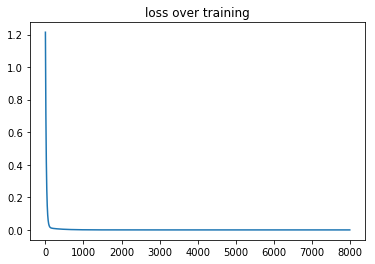

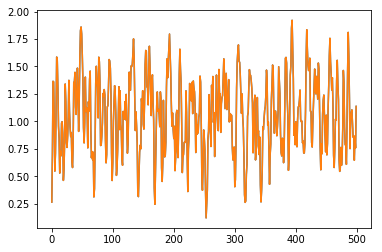

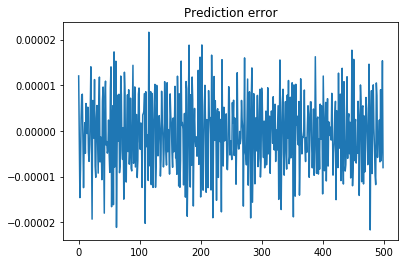

In [841]:
layer.set_weights([np.fliplr(layer.get_weights()[0])])
predicted = model.predict(X)


#Compare out and predicted
plt.figure()
plt.plot(history.history['loss'])
plt.title('loss over training')

plt.figure()
plt.plot(Y[0,:,0])
plt.plot(predicted[0,:,0])
plt.figure()
plt.plot(predicted[0,:,0]-Y[0,:,0])
plt.title('Prediction error')

[0.31017196 0.9096986  0.5277509  0.32761505]


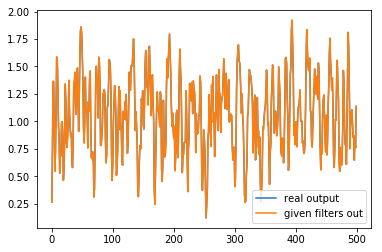

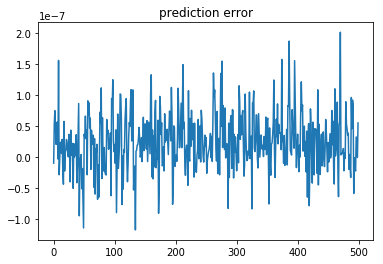

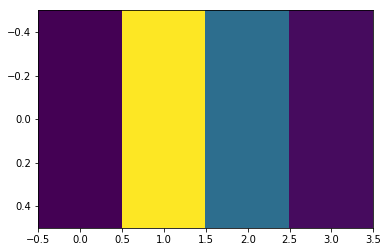

In [848]:
##### Test conv output with given filter

model2 = Sequential()
layer2 = Conv1D(input_shape=np.shape(X)[1:3],filters=1,kernel_size=time_window,strides=1,
               padding='causal',kernel_initializer='random_uniform', dilation_rate=1,use_bias=True)

model2.add(layer2)

#weights = [100*np.ones((10,1,1)),np.zeros(1)]
strf = np.flip(strf,axis=0)
weights = [np.swapaxes(np.atleast_3d(strf),0,1),np.zeros(1)]
layer2.set_weights(weights)

predicted2 = model2.predict(X)

plt.figure()
plt.plot(Y[0,:,0])
plt.plot(predicted2[0,:,0])
plt.legend(('real output','given filters out'))

plt.figure()
plt.plot(Y[0,:,0]-predicted2[0,:,0])
plt.title('prediction error')
print(layer.get_weights()[0].squeeze())
plt.figure()
plt.imshow(np.transpose(np.expand_dims(layer.get_weights()[0].squeeze(),axis=1)),aspect='auto')

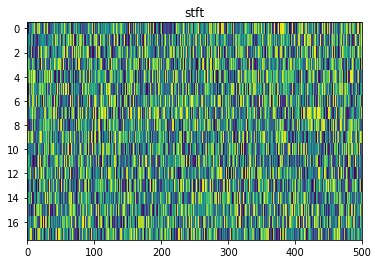

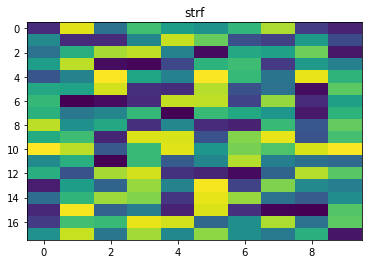

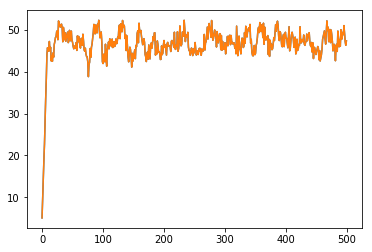

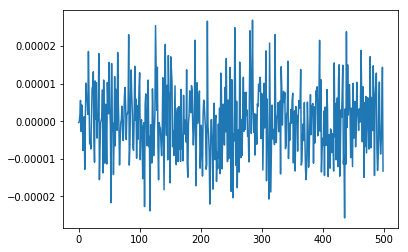

In [849]:
##### 2D Case ####

import scipy.io.wavfile as wavefile
import scipy.signal as signal
import numpy as np
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Conv1D,Dense,Conv2D
from keras.layers.advanced_activations import LeakyReLU
from keras.constraints import non_neg
import keras.initializers as initializers

ONED = False
num = 500

if ONED:
	a = np.array([0,0,1,0,0])
	b = np.array([0,0,1])
	c = signal.convolve(a,b,mode="full")
	c = c[0:len(a)]
	print('signal conv')
	print(c)
	print('\n\n\n')

	model = Sequential()
	layer = Conv1D(input_shape=(len(a),1),filters=1,kernel_size=len(b),strides=1,
	                   padding='causal',kernel_initializer='random_uniform',dilation_rate=1,use_bias=False) #

	model.add(layer)


	#print(model.get_weights())
	weights = [np.atleast_3d(b).swapaxes(0,1)]


	layer.set_weights(weights)
	model.compile(loss='mean_squared_error', optimizer='sgd')

	a_fed = np.atleast_3d(a)#.swapaxes(0,1)
	print(a_fed)
	print(weights)
	predicted = model.predict(a_fed)
	print(predicted)

else:
    ### STFT ###
	nbFbins = 18
	stft = np.random.rand(nbFbins,num)
	plt.imshow(stft,aspect='auto')
	plt.title('stft')

	### STRF ###
	time_window = 10
	strf = np.random.rand(nbFbins,time_window)
	strf = np.fliplr(strf)
	plt.figure()
	plt.imshow(strf,aspect='auto')
	plt.title('strf')
	  
	### Convolution ###
	for fbin in range(np.shape(stft)[0]):
	    #conved[fbin,:] = signal.convolve(stft[fbin,:],strf[fbin,:],method='direct',mode='same')
	    if fbin==0:
	        conved = signal.convolve(stft[fbin,:],strf[fbin,:],method='direct',mode='full')
	    else:
	        conved += signal.convolve(stft[fbin,:],strf[fbin,:],method='direct',mode='full')
	conved = conved[0:num]
	plt.figure()
	plt.plot(conved)
    
	X = np.atleast_3d(stft)
	X = X.swapaxes(0,2)
	#print(np.shape(X)[1:3])
    
### Test Network with given weights ###
	model = Sequential()
	layer = Conv1D(input_shape=(np.shape(X)[1:3]),filters=1,kernel_size=np.shape(strf)[1],strides=1,
	                   padding='causal',kernel_initializer='random_uniform',dilation_rate=1,use_bias=False) #

	model.add(layer)

	strf = np.fliplr(strf)
	weights = [np.atleast_3d(strf).swapaxes(0,1)]
	layer.set_weights(weights)
	model.compile(loss='mean_squared_error', optimizer='sgd')

	predicted = model.predict(X)
	#fig = plt.figure()
	plt.plot(predicted[0,:,0])
	plt.figure()
	plt.plot(predicted[0,:,0]-conved)

#### Train network ###

Y = np.atleast_3d(conved)
Y = Y.swapaxes(0,2)
    
model2 = Sequential()
layer2 = Conv1D(input_shape=(np.shape(X)[1:3]),filters=1,kernel_size=time_window,strides=1,
                   padding='causal',dilation_rate=1,use_bias=False) 
    
layer2.kernel_initializer = initializers.RandomUniform(minval=-0.05, maxval=0.05, seed=None)
model2.add(layer2)
    
model2.compile(loss='mean_squared_error', optimizer='sgd')

# Fit the model
history2 = model2.fit(X, Y, epochs=8000)

	predicted2 = model2.predict(X)


#Compare out and predicted
	plt.figure()
	plt.plot(history2.history['loss'])
	plt.title('loss over training')

	plt.figure()
	plt.plot(Y[0,:,0])
	plt.plot(predicted2[0,:,0])
	plt.legend(('output','prediction'))
    
	plt.figure()
	plt.plot(Y[0,:,0]-predicted2[0,:,0])
	plt.title('prediction error')

